In [1]:
import pandas as pd


In [2]:
# Step 1: Data Acquisition
df = pd.read_csv('20191226-reviews.csv')

In [7]:
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
# Step 2: Text Cleaning
# Removing duplicates
df = df.drop_duplicates(subset=['title', 'body'])
# Removing null entries
df = df.dropna(subset=['title', 'body'])
# Removing stop words, punctuation, and special characters
stop_words = set(stopwords.words('english'))
df['cleaned_title'] = df['title'].apply(lambda x: ' '.join([word for word in word_tokenize(str(x)) if word.lower() not in stop_words and word.isalnum()]))
df['cleaned_body'] = df['body'].apply(lambda x: ' '.join([word for word in word_tokenize(str(x)) if word.lower() not in stop_words and word.isalnum()]))

In [9]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
# Step 3: Preprocessing
# Tokenization
df['tokenized_title'] = df['cleaned_title'].apply(lambda x: word_tokenize(x))
df['tokenized_body'] = df['cleaned_body'].apply(lambda x: word_tokenize(x))
# Stemming
ps = PorterStemmer()
df['stemmed_title'] = df['tokenized_title'].apply(lambda x: [ps.stem(word) for word in x])
df['stemmed_body'] = df['tokenized_body'].apply(lambda x: [ps.stem(word) for word in x])
# Lemmatization
lemmatizer = WordNetLemmatizer()
df['lemmatized_title'] = df['tokenized_title'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df['lemmatized_body'] = df['tokenized_body'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [10]:
from sklearn.preprocessing import LabelEncoder
# Mapping ratings to sentiments (1-2: Negative, 3: Neutral, 4-5: Positive)
df['sentiment'] = df['rating'].apply(lambda x: 'negative' if x in [1, 2] else 'neutral' if x == 3 else 'positive')
# Label encoding
le = LabelEncoder()
df['sentiment_encoded'] = le.fit_transform(df['sentiment'])
# Concatenating title and body into a single text field
df['text'] = df['cleaned_title'] + ' ' + df['cleaned_body']

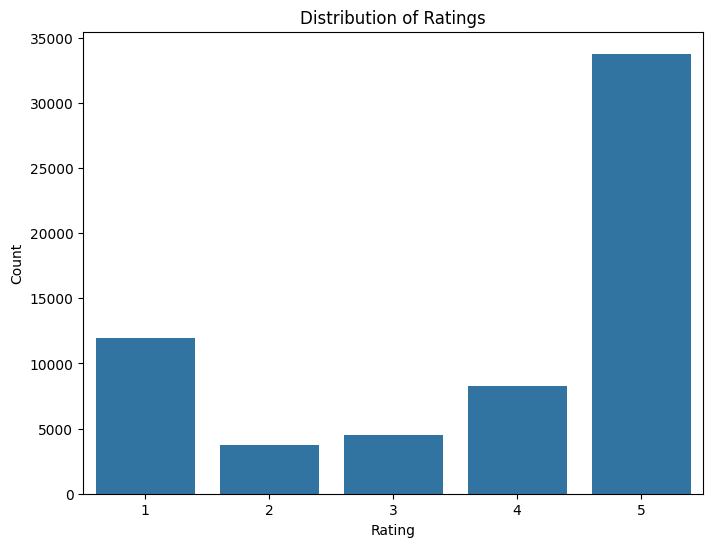

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
# Step 4: Exploratory Data Analysis (EDA)
# Distribution of Ratings
plt.figure(figsize=(8,6))
sns.countplot(x='rating', data=df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

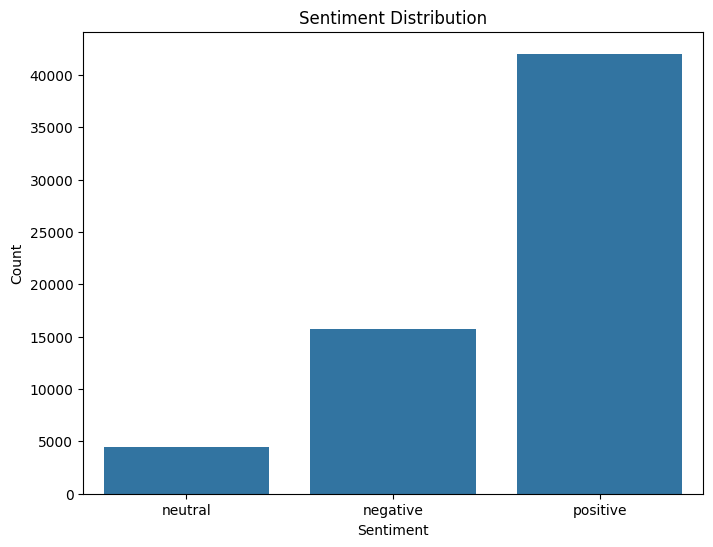

In [12]:
# Sentiment Distribution
plt.figure(figsize=(8,6))
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

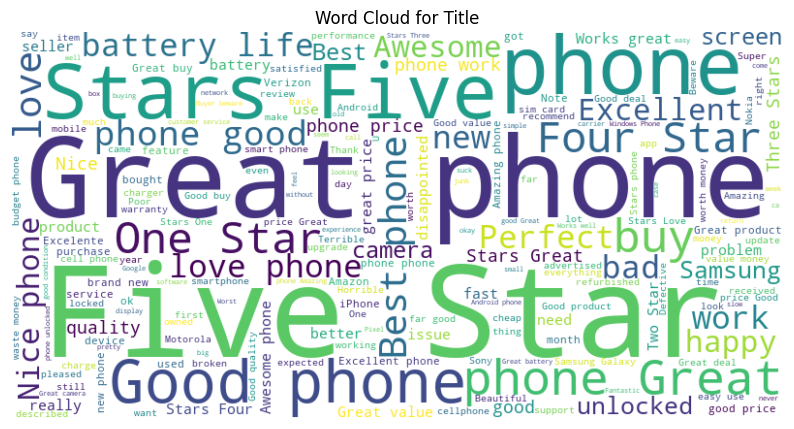

In [13]:
from wordcloud import WordCloud
# Word Cloud for Title
title_text = ' '.join(df['cleaned_title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(title_text)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Title')
plt.axis('off')
plt.show()

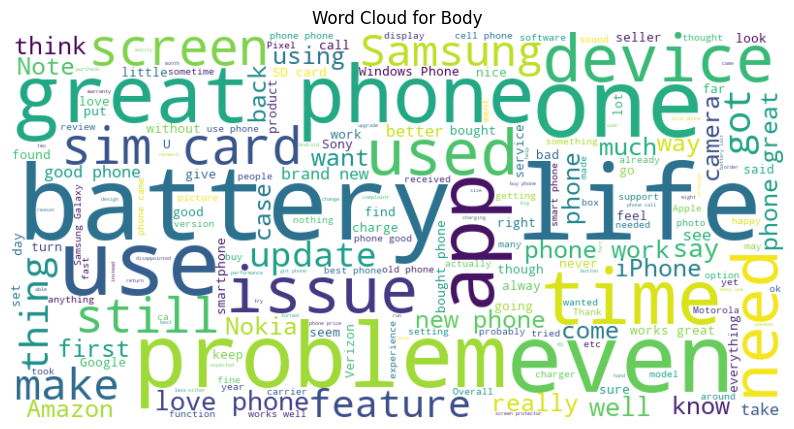

In [14]:
# Word Cloud for Body
body_text = ' '.join(df['cleaned_body'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(body_text)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Body')
plt.axis('off')
plt.show()

In [15]:
from collections import Counter
# Top 10 Most Common Words in Title
title_words = ' '.join(df['cleaned_title'].dropna()).split()
title_word_counts = Counter(title_words)
top_10_title_words = title_word_counts.most_common(10)
top_10_title_words

[('phone', 13550),
 ('Stars', 6289),
 ('Great', 5752),
 ('Five', 4473),
 ('Phone', 2878),
 ('good', 2750),
 ('great', 2636),
 ('Good', 2573),
 ('price', 2010),
 ('buy', 1360)]

In [16]:
# Top 10 Most Common Words in Body
body_words = ' '.join(df['cleaned_body'].dropna()).split()
body_word_counts = Counter(body_words)
top_10_body_words = body_word_counts.most_common(10)
top_10_body_words

[('phone', 87213),
 ('great', 14343),
 ('screen', 13396),
 ('good', 13225),
 ('like', 12534),
 ('battery', 12473),
 ('one', 11775),
 ('use', 11475),
 ('get', 9872),
 ('new', 9870)]

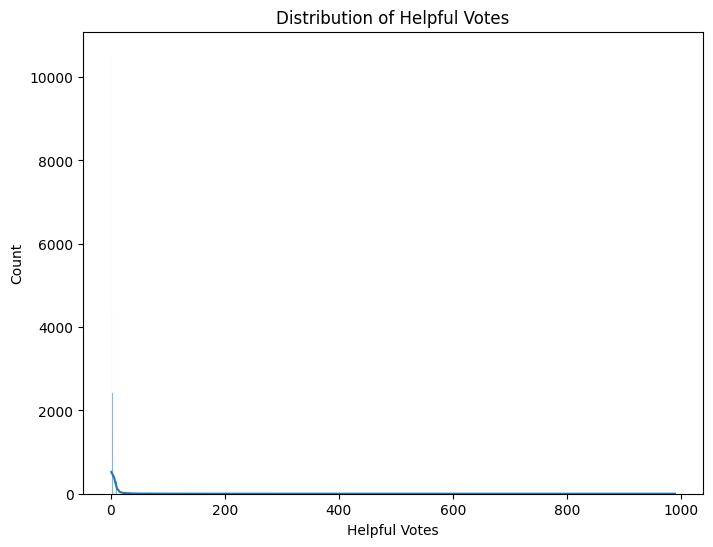

In [17]:
# Distribution of Helpful Votes
plt.figure(figsize=(8,6))
sns.histplot(df['helpfulVotes'], kde=True)
plt.title('Distribution of Helpful Votes')
plt.xlabel('Helpful Votes')
plt.ylabel('Count')
plt.show()

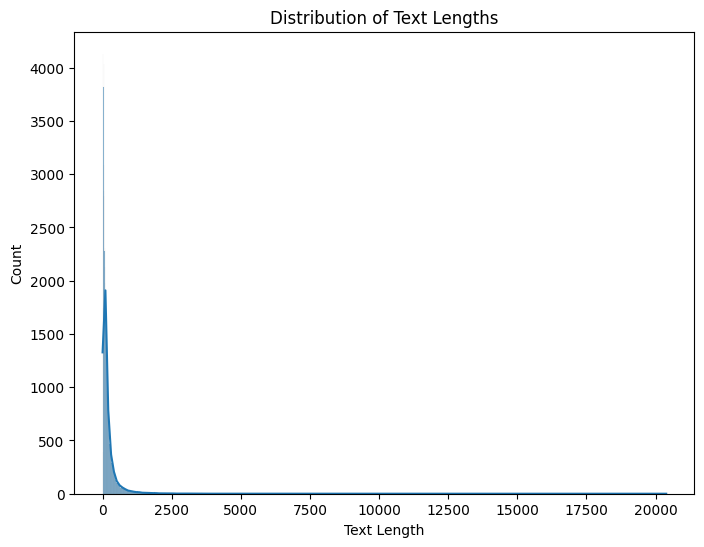

In [19]:
# Length of Text Analysis
df['text_length'] = df['text'].apply(len)

plt.figure(figsize=(8,6))
sns.histplot(df['text_length'], kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()


In [20]:
# Saving the preprocessed data to a CSV file with the same column names as before
df.to_csv('preprocessed_data.csv', index=False)